# 3-Layer NN for Classifciation(using framework)

## 1. 라이브러리 가져오기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from dataloader import Dataloader

## 2. Train데이터, Test데이터 로드하기

In [2]:
# 데이터 로드해오기
train_loader = Dataloader(path="./", is_train = True, shuffle=True)
test_loader = Dataloader(path="./", is_train = False, shuffle=True)

train_images= train_loader.images
train_labels = train_loader.labels
test_images = test_loader.images
test_labels = test_loader.labels

# flatten 시키기
train_x_flatten = train_images.reshape(train_images.shape[0], -1)
test_x_flatten = test_images.reshape(test_images.shape[0], -1)

# normalization: 0과 1사이로 정규화 시키기
train_images = train_x_flatten/255.
test_images = test_x_flatten/255.

train_labels = train_labels
test_labels = test_labels

train_images: (60000, 784)

test_images: (60000, 10)

train_labels: (10000, 784)

test_labels: (10000, 10)

## 3. model 만들기(3NN)

In [3]:
# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\yunhs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4. 학습하고 정확도 측정하기

In [4]:
history = model.fit(train_images, train_labels, epochs=100, batch_size=100, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5696 - loss: 1.5676 - val_accuracy: 0.8781 - val_loss: 0.4914
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8770 - loss: 0.4650 - val_accuracy: 0.9068 - val_loss: 0.3505
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9008 - loss: 0.3537 - val_accuracy: 0.9159 - val_loss: 0.3047
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9114 - loss: 0.3125 - val_accuracy: 0.9231 - val_loss: 0.2778
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9217 - loss: 0.2782 - val_accuracy: 0.9279 - val_loss: 0.2588
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9249 - loss: 0.2641 - val_accuracy: 0.9323 - val_loss: 0.2398
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9294 - loss: 0.2506 - val_accuracy: 0.9361 - val_loss: 0.2270
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9344 - loss: 0.2320 - val_accu

# <결과물>

## Result1. Loss graph 그리기

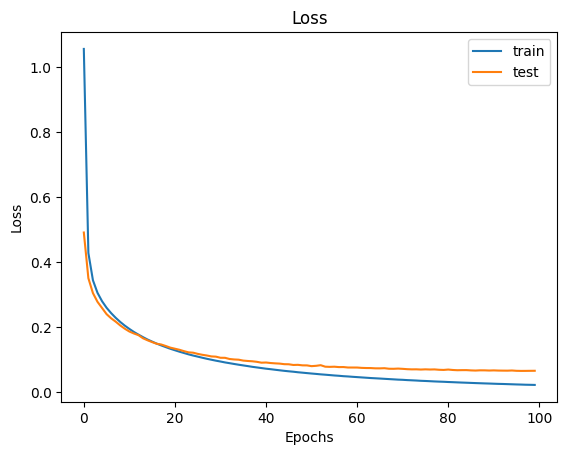

In [6]:
# loss 그래프

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Result2. confusion matrix 그리기

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
(10000, 10)
[7 2 1 ... 4 5 6]
(10000,)


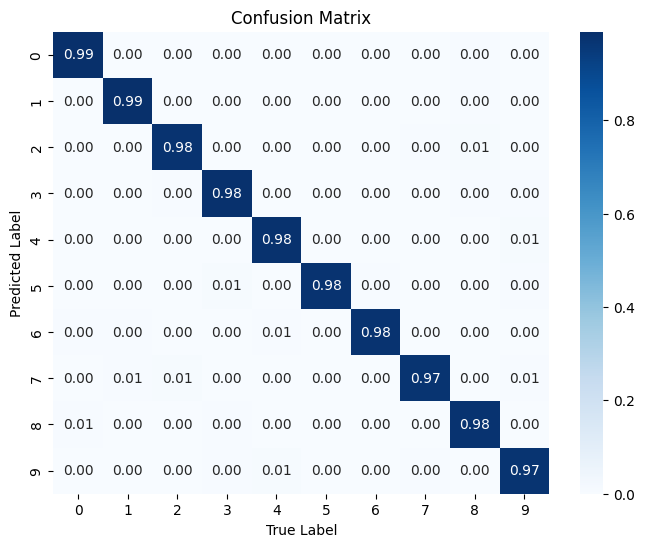

In [7]:
# 예측값 생성

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
# Confusion Matrix 생성 및 정규화
cm = confusion_matrix(y_true, y_pred_classes, normalize='true')

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('True Label')  
plt.ylabel('Predicted Label')  
plt.title('Confusion Matrix')
plt.show()


## Result3-1. Top3 images 뽑아내기

(10000, 10)
(10000, 10)


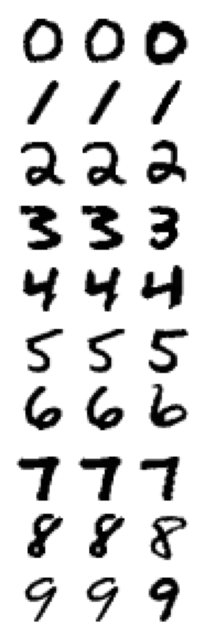

In [67]:
top3_data = [[] for _ in range(10)]

for i in range(len(y_pred)):
    for j in range(10):
        if len(top3_data[j])<3:
            top3_data[j].append((i,y_pred[i][j]))
        else:
            for k in range(3):
                if top3_data[j][k][1]<y_pred[i][j]:
                    top3_data[j].remove(min(top3_data[j], key=lambda x: x[1]))
                    top3_data[j].append((i,y_pred[i][j]))
                else:
                    continue

top3_sort = [[] for _ in range(10)]
for i in range(10):
    top3_sort[i] = sorted(top3_data[i], key= lambda x: x[1], reverse=True)

final_combined_image = None
for i in range(10):
    image1 = 1 - test_loader.images[top3_sort[i][0][0]].reshape(28,28)
    image2 = 1 - test_loader.images[top3_sort[i][1][0]].reshape(28,28) 
    image3 = 1 - test_loader.images[top3_sort[i][2][0]].reshape(28,28) 
    combined_image = np.hstack((image1, image2, image3))
    if final_combined_image is None:
        final_combined_image = combined_image
    else:
        # 기존의 final_combined_image에 새로 연결된 이미지를 세로로 추가
        final_combined_image = np.vstack((final_combined_image, combined_image))

    # 결과 출력
plt.figure(figsize=(8, 8))
plt.imshow(final_combined_image, cmap='gray')
plt.axis('off')  # 축 숨기기
plt.show()

## Result3-2. Top3 images에 대한 확률 뽑아내기

In [57]:
for i in range(10):
    print(f"{round(top3_sort[i][0][1]*100,1)}%, {round(top3_sort[i][1][1]*100,1)}%, {round(top3_sort[i][2][1]*100,1)}%")
    print()

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

100.0%, 100.0%, 100.0%

